# Mapas Auto-Organizados o SOM

In [1]:
# Importación de librerías.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

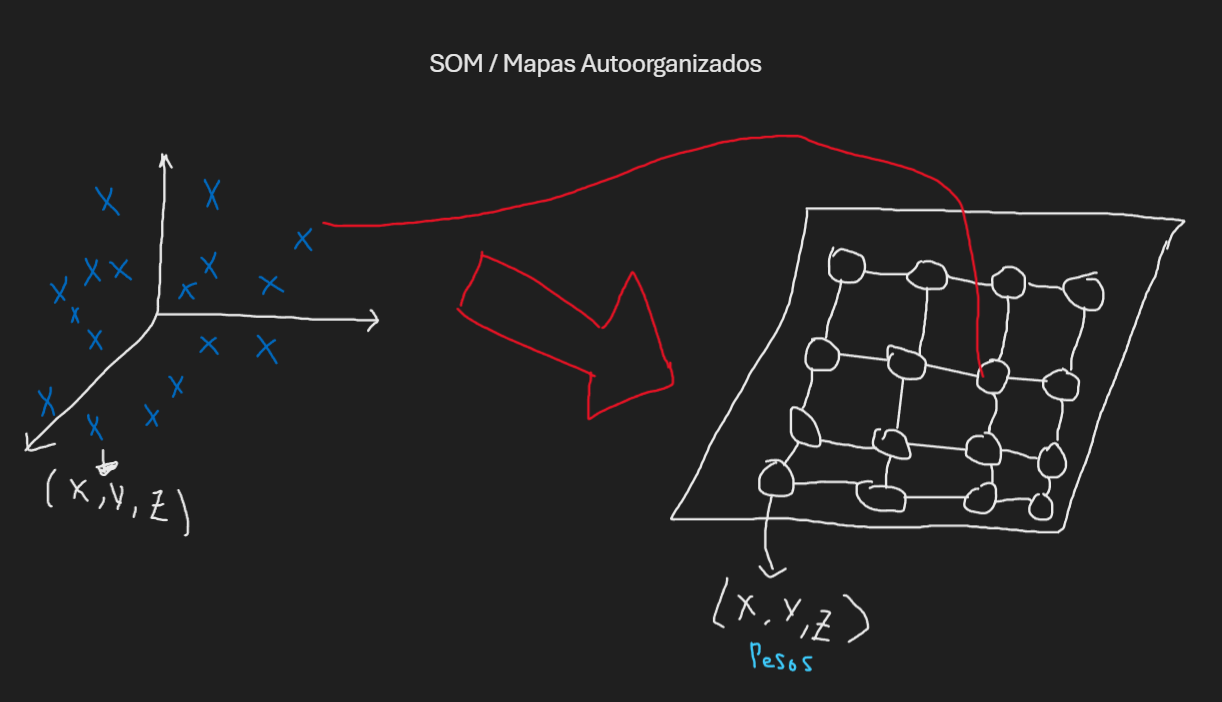

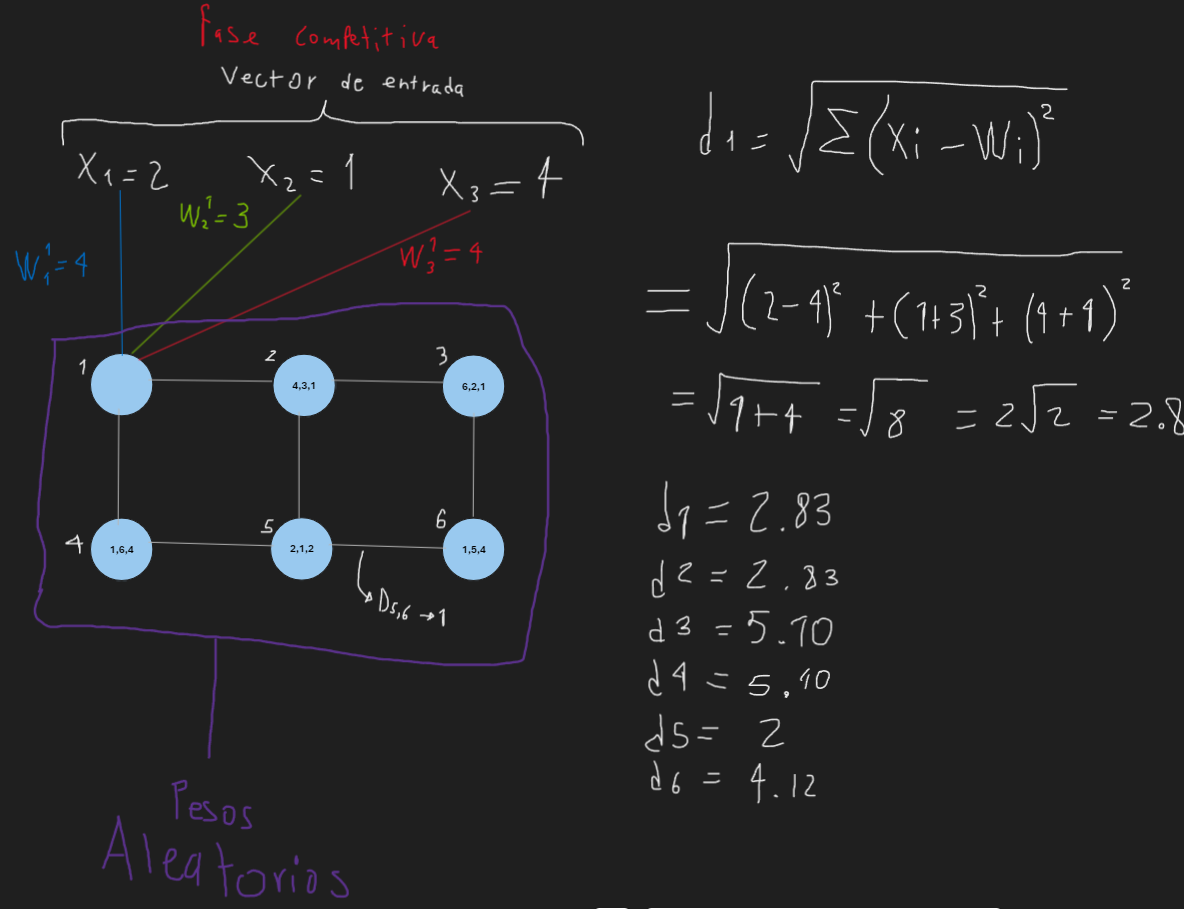

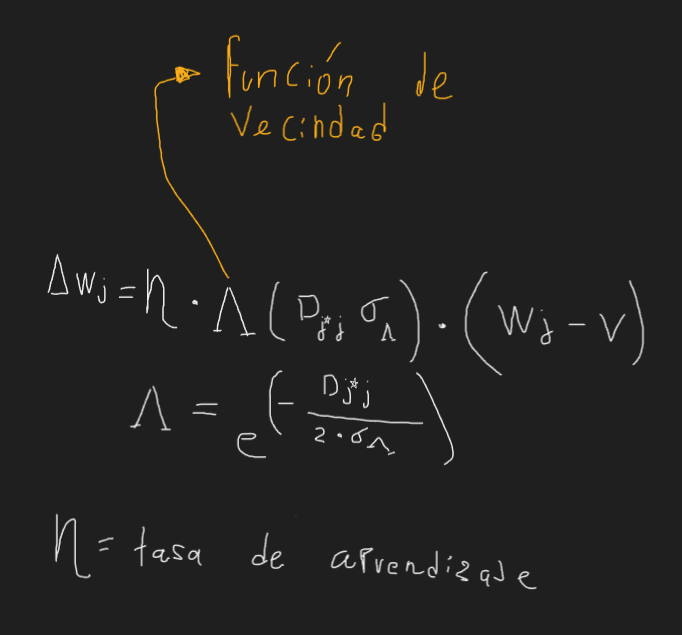

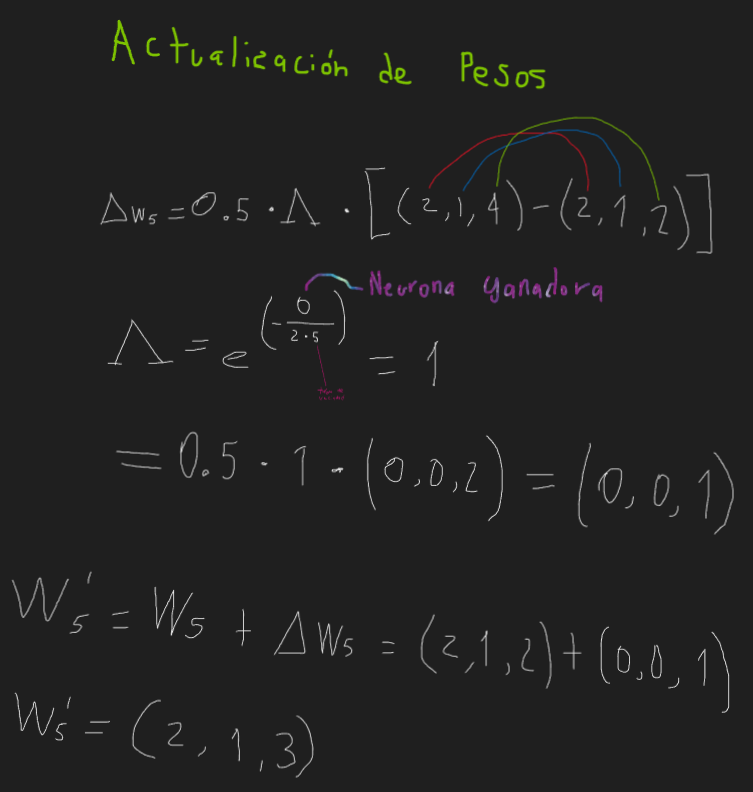

In [44]:
# Mapas auto-organizados o SOM.
class SOM:
    # Constructor.
    def __init__(self, n, m, dim, learning_rate=0.1, sigma=1.0):
        # Inicialización de los pesos.
        self.weights = np.random.rand(n, m, dim)
        # Inicialización de la tasa de aprendizaje.
        self.learning_rate = learning_rate
        # Inicialización del radio.
        self.sigma = sigma

    # Función de entrenamiento.
    def train(self, data, epochs):
        # Número de datos.
        n = data.shape[0]
        # Número de dimensiones.
        dim = data.shape[1]
        # Número de neuronas.
        n_neurons = self.weights.shape[0] * self.weights.shape[1]
        # Entrenamiento.
        for epoch in range(epochs):
            # Tasa de aprendizaje.
            lr = self.learning_rate * (1 - epoch / epochs)
            # Radio.
            s = self.sigma * (1 - epoch / epochs)
            # Selección de un dato aleatorio.
            dA = np.random.randint(n)
            # Dato.
            x = data[dA]
            # Cálculo de la distancia euclidiana.
            distances = np.linalg.norm(self.weights - x, axis=2)
            #* Neurona ganadora.
            winner = np.unravel_index(np.argmin(distances), distances.shape)
            #^ Actualización de los pesos.
            for i in range(self.weights.shape[0]):
                for j in range(self.weights.shape[1]):
                    d = np.linalg.norm(np.array([i, j]) - np.array(winner))
                    if d <= s:
                        h = np.exp(-d**2 / (2 * s**2))
                        self.weights[i, j] += lr * h * (x - self.weights[i, j])

    # Función de predicción.
    def predict(self, data):
        # Número de datos.
        n = data.shape[0]
        # Número de dimensiones.
        dim = data.shape[1]
        # Predicción.
        predictions = np.zeros(n)
        # Predicción.
        for i in range(n):
            x = data[i]
            distances = np.linalg.norm(self.weights - x, axis=2)
            winner = np.unravel_index(np.argmin(distances), distances.shape)
            predictions[i] = winner[0] * self.weights.shape[1] + winner[1]
        return predictions


In [62]:
from sklearn.preprocessing import StandardScaler

# Lectura de datos.
df = pd.read_csv("C:/Users/Cristian/Programacion/Python/Redes_Neuronales/Iris.csv")
# Datos.
data = df.iloc[:, 1:5].values # Se eliminan las columnas de identificación. (Id, Species)
# Normalización de los datos.
data = (data - data.mean(axis=0)) / data.std(axis=0)

# Escalar los datos.
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)

# Número de dimensiones.
dim = data.shape[1]
# dim = data_scaled.shape[1]  # Dimensionalidad de los datos.
# Número de neuronas.
n = 10
m = 10

In [63]:
# Número de épocas.
epochs = 1000
# Creación del modelo.
model = SOM(n, m, dim)
# Entrenamiento.
model.train(data, epochs)
# Predicción.
predictions = model.predict(data)

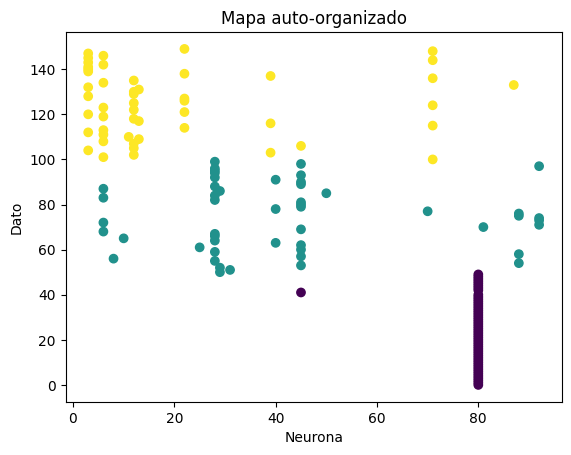

In [64]:
# Gráfica.
plt.scatter(predictions, np.arange(data.shape[0]), c=df["Species"].astype("category").cat.codes)
plt.xlabel("Neurona")
plt.ylabel("Dato")
plt.title("Mapa auto-organizado")
plt.show()